In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score



from pandas import Series, DataFrame

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#checking if any null value in whole dataset
null_values = dataset.isnull().sum()
print(null_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
#cheking zeros in dataset
glu = (dataset['Glucose']==0).sum()
bp = (dataset['BloodPressure']==0).sum()
bmi = (dataset['BMI']==0).sum() 
print(glu)
print(bp)
print(bmi)

5
35
11


In [7]:
#glucose, blood_pressure, BMI can not be zero. 
#filling zero values with median
dataset.Glucose.replace(0,dataset.Glucose.mean(), inplace=True)
dataset.BloodPressure.replace(0,dataset.BloodPressure.mean(), inplace=True)
dataset.BMI.replace(0,dataset.BMI.mean(), inplace=True)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

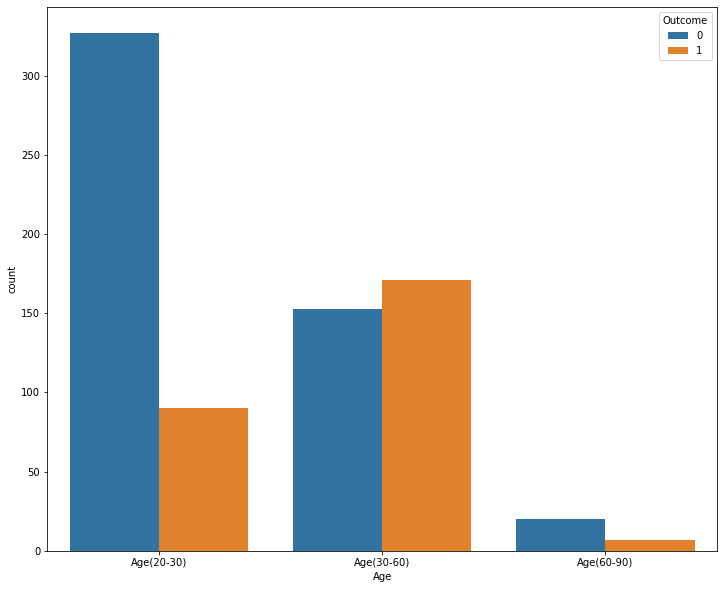

In [8]:
age_bins=pd.cut(dataset["Age"],bins=[20,30,60,90],labels=["Age(20-30)","Age(30-60)","Age(60-90)"])
plt.figure(figsize=(12,10))
sns.countplot(age_bins,hue=dataset["Outcome"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='count'>

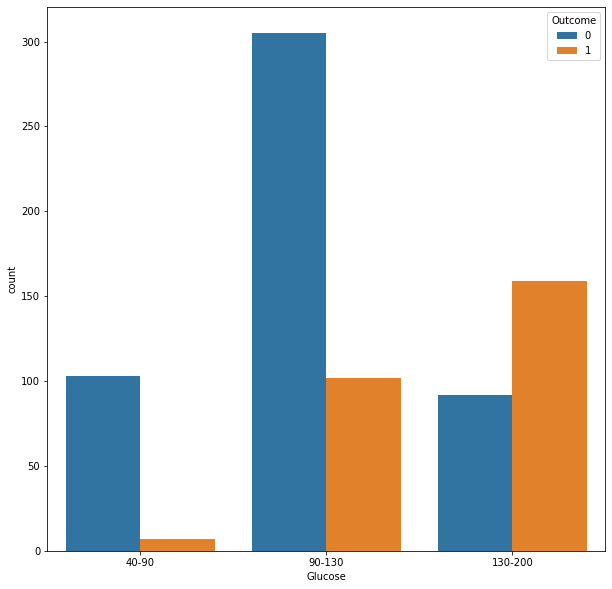

In [9]:
glucose_bins=pd.cut(dataset["Glucose"],bins=[40,90,130,200],labels=["40-90","90-130","130-200"])
plt.figure(figsize=(10,10))
sns.countplot(glucose_bins,hue=dataset["Outcome"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

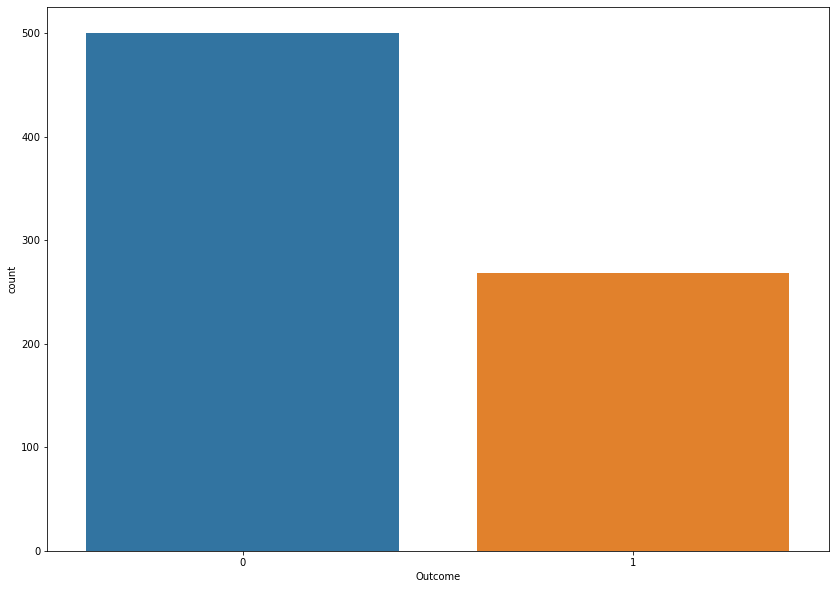

In [10]:
plt.figure(figsize=(14,10))
sns.countplot("Outcome",data=dataset)

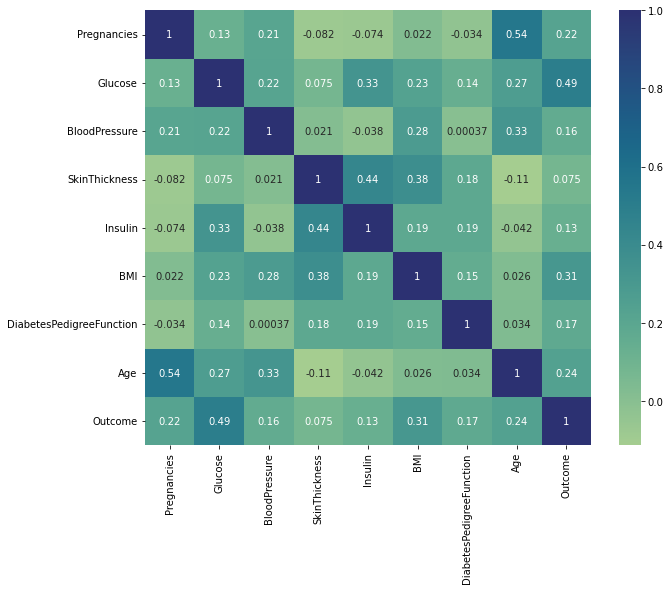

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap="crest")
plt.show()

In [166]:
features=dataset.drop(['Outcome','DiabetesPedigreeFunction','SkinThickness'],axis =1)
labels=dataset.iloc[:,8].values

In [227]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,Y_test=train_test_split(features,labels,test_size=0.2,random_state=2)
print(X_train)

     Pregnancies  Glucose  BloodPressure  Insulin   BMI  Age
602            1    124.0      74.000000        0  27.8   30
429            1     95.0      82.000000      180  35.0   43
623            0     94.0      70.000000      115  43.5   21
209            7    184.0      84.000000        0  35.5   41
589            0     73.0      69.105469        0  21.1   25
..           ...      ...            ...      ...   ...  ...
534            1     77.0      56.000000       56  33.3   24
584            8    124.0      76.000000      600  28.7   52
493            4    125.0      70.000000      122  28.9   45
527            3    116.0      74.000000      105  26.3   24
168            4    110.0      66.000000        0  31.9   29

[614 rows x 6 columns]


In [236]:
X_train, X_test, y_train, Y_test = train_test_split(features, labels, test_size = 0.2, random_state = 2)

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [229]:
from sklearn.utils.class_weight import compute_sample_weight
w_train = compute_sample_weight('balanced', y_train)
print(w_train, y_train)

[0.78516624 1.37668161 0.78516624 1.37668161 0.78516624 1.37668161
 0.78516624 0.78516624 0.78516624 0.78516624 0.78516624 0.78516624
 0.78516624 1.37668161 1.37668161 0.78516624 0.78516624 1.37668161
 0.78516624 1.37668161 0.78516624 0.78516624 1.37668161 1.37668161
 0.78516624 0.78516624 0.78516624 0.78516624 0.78516624 1.37668161
 0.78516624 0.78516624 1.37668161 1.37668161 0.78516624 1.37668161
 0.78516624 0.78516624 0.78516624 1.37668161 1.37668161 1.37668161
 1.37668161 1.37668161 0.78516624 0.78516624 1.37668161 1.37668161
 0.78516624 0.78516624 1.37668161 1.37668161 1.37668161 0.78516624
 0.78516624 0.78516624 0.78516624 0.78516624 1.37668161 0.78516624
 0.78516624 0.78516624 0.78516624 1.37668161 1.37668161 1.37668161
 1.37668161 0.78516624 0.78516624 0.78516624 0.78516624 1.37668161
 0.78516624 1.37668161 1.37668161 0.78516624 0.78516624 0.78516624
 0.78516624 0.78516624 1.37668161 0.78516624 1.37668161 1.37668161
 0.78516624 1.37668161 0.78516624 1.37668161 0.78516624 0.7851

In [237]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(Y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.7727272727272727


In [238]:
print('F1 score of the Logistic Regression model is {}'.format(f1_score(Y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.5783132530120482


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [240]:

from sklearn.model_selection import KFold, cross_val_score


scores = cross_val_score(lr, X_test, Y_test,scoring="f1", cv = 5)


print("Cross Validation Scores: ", scores)
print("mean CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.73684211 0.375      0.66666667 0.53333333 0.5       ]
mean CV Score:  0.5623684210526315
Number of CV Scores used in Average:  5


In [ ]:
#logistic regression is the good try because we are checking either it 